In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [26]:
def calc_metrics(VP, VN, FP, FN):
    N = VP + VN + FP + FN

    accuracy = (VP + VN) / N if N != 0 else 0

    sensitivity = VP / (VP + FN) if (VP + FN) != 0 else 0

    specificity = VN / (VN + FP) if (VN + FP) != 0 else 0

    precision = VP / (VP + FP) if (VP + FP) != 0 else 0

    if precision + sensitivity != 0:
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    else:
        f1_score = 0


    return {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1_score}

In [27]:
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
y_pred_prob = [0.1, 0.8, 0.7, 0.2, 0.9, 0.4, 0.85, 0.6, 0.95, 0.3]

In [28]:
VP = sum(1 for true, pred in zip(y_true, y_pred_prob) if true == 1 and pred >= 0.5)
VN = sum(1 for true, pred in zip(y_true, y_pred_prob) if true == 0 and pred < 0.5)
FP = sum(1 for true, pred in zip(y_true, y_pred_prob) if true == 0 and pred >= 0.5)
FN = sum(1 for true, pred in zip(y_true, y_pred_prob) if true == 1 and pred < 0.5)

In [29]:
metrics = calc_metrics(VP, VN, FP, FN)

In [30]:
print("Metricas de Avaliação:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Metricas de Avaliação:
accuracy: 0.8000
sensitivity: 0.8333
specificity: 0.7500
precision: 0.8333
f1_score: 0.8333


In [31]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

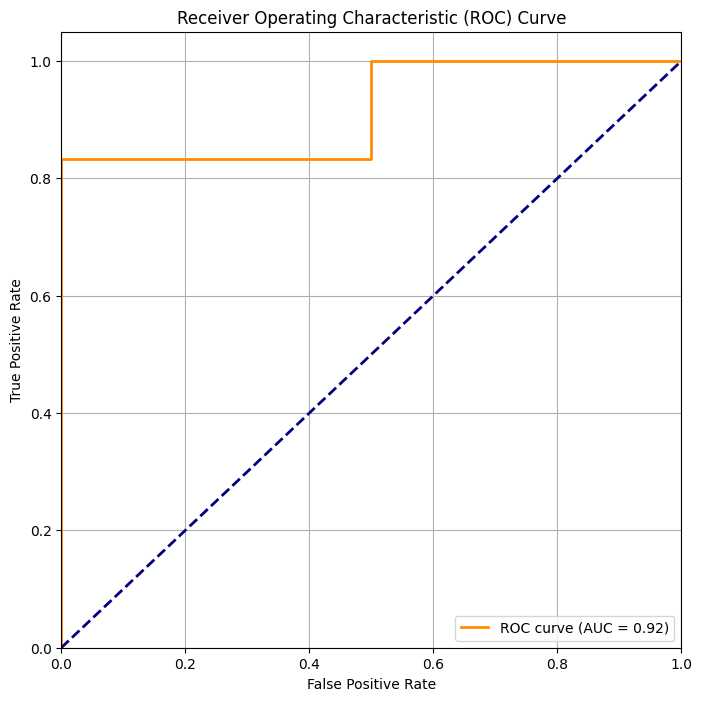

In [32]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
